## CNN AutoEncoder

In [22]:
import zipfile
import os

# Path to uploaded ZIP file
uploaded_zip_path = '/content/archive (3).zip'
extraction_path = '/content/coil-20/coil-20-proc/coil-20/coil-20-proc/coil-20/coil-20-proc'

# Extracting the ZIP file
with zipfile.ZipFile(uploaded_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# Checking extracted contents
extracted_files = os.listdir(extraction_path)
print(f"Extracted {len(extracted_files)} files.")

Extracted 1441 files.


In [16]:
import cv2
import matplotlib.pyplot as plt
import os

In [17]:
# Directory where images are extracted
image_dir = '/content/coil-20/coil-20-proc/coil-20/coil-20-proc/coil-20/coil-20-proc'

# Getting a list of image file names
image_files = [file for file in os.listdir(image_dir) if file.endswith(('.png', '.jpg', '.jpeg'))]

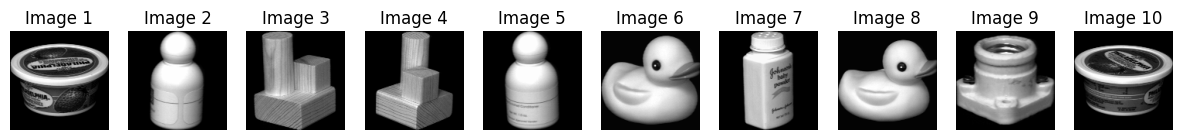

In [23]:
# Displaying the first few images
plt.figure(figsize=(15, 10))
for i, image_file in enumerate(image_files[:10]):  # Display only 5 images
    img_path = os.path.join(image_dir, image_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image as grayscale

    plt.subplot(2, 10, i + 1)  # Create a subplot for each image
    plt.imshow(img, cmap='gray')
    plt.title(f"Image {i + 1}")
    plt.axis('off')

plt.show()

First 5 images are loaded in grayscale format (cv2.IMREAD_GRAYSCALE) and resized to consistent dimensions (64x64).

In [24]:
# Importing necessary libraries into the workspace
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Reshape
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [25]:
# Loading and preprocessing the dataset
images = []
for image_file in image_files:
    img_path = os.path.join(image_dir, image_file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Grayscale
    img = cv2.resize(img, (64, 64))  # Resizing to 64x64
    images.append(img)

images = np.array(images).astype('float32') / 255.0  # Normalizing to [0, 1]
images = np.expand_dims(images, axis=-1)  # Adding channel dimension

- Image Loading:
All images in the directory are loaded, resized to 64x64, and converted to grayscale.
- Normalization:
Pixel values are scaled to the range [0, 1] (float32) to ensure numerical stability during training.
- Adding Channel Dimension:
Images are reshaped to include a channel dimension, making the input shape compatible with the CNN (64x64x1).

In [26]:
# Splitting the dataset into training and testing sets
train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

Dataset is split into 80% training and 20% testing using train_test_split from sklearn.

In [27]:
# Defining the CNN Autoencoder
input_shape = (64, 64, 1)
latent_dim = 64

input_img = Input(shape=input_shape)

In [28]:
# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(64, (3, 3), activation='relu', padding='same', strides=2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', strides=2)(x)
x = Flatten()(x)
latent = Dense(latent_dim, activation='relu')(x)

- Reduces the high-dimensional input image (64x64x1) to a latent space (64-dimensional vector) using convolutional layers with ReLU activation and Stride=2 in some layers to downsample the spatial dimensions.
- Output: A compressed latent representation (feature vector) of the input image.

In [29]:
# Decoder
x = Dense(16 * 16 * 128, activation='relu')(latent)
x = Reshape((16, 16, 128))(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=2)(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=2)(x)
output_img = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

Reconstructs the original image from the latent space using:
- Dense layer to reshape the latent vector into a feature map.
- Transposing convolution layers to upsample back to the original dimensions.
- Sigmoid activation in the output layer to ensure pixel values are in [0, 1].

In [30]:
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

- Loss Function: Mean Squared Error (MSE) minimizes the difference between input and reconstructed images.
- Optimizer: Adam optimizer with a learning rate of 0.001 for efficient gradient updates.

In [31]:
# Model training
history = autoencoder.fit(
    train_images, train_images,
    validation_data=(test_images, test_images),
    epochs=20,
    batch_size=32,
    shuffle=True
)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 31s 787ms/step - loss: 0.1229 - val_loss: 0.0639
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 39s 741ms/step - loss: 0.0516 - val_loss: 0.0305
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 25s 688ms/step - loss: 0.0274 - val_loss: 0.0213
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 24s 656ms/step - loss: 0.0197 - val_loss: 0.0159
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 643ms/step - loss: 0.0146 - val_loss: 0.0135
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 40s 625ms/step - loss: 0.0125 - val_loss: 0.0119
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 24s 662ms/step - loss: 0.0107 - val_loss: 0.0106
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 22s 619ms/step - loss: 0.0092 - val_loss: 0.0100
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 24s 664ms/step - loss: 0.0089 - val_loss: 0.0093
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 41s 660ms/step - loss: 0.0081 - val_loss: 0.0086
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 43s 733ms/step - loss: 0.0074 - val_loss: 0.0082
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 24

Training is performed for 20 epochs with a batch size of 32. The model is validated on the test set after each epoch.

Outputs:
- Training and validation loss curves (to monitor learning progress).
- The trained model is ready to evaluate and generate reconstructed images.

In [32]:
# Model evaluation
test_loss = autoencoder.evaluate(test_images, test_images)
print("Test MSE Loss:", test_loss)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 0.0062
Test MSE Loss: 0.005892283283174038


The MSE loss is computed on the test set to quantify reconstruction accuracy.

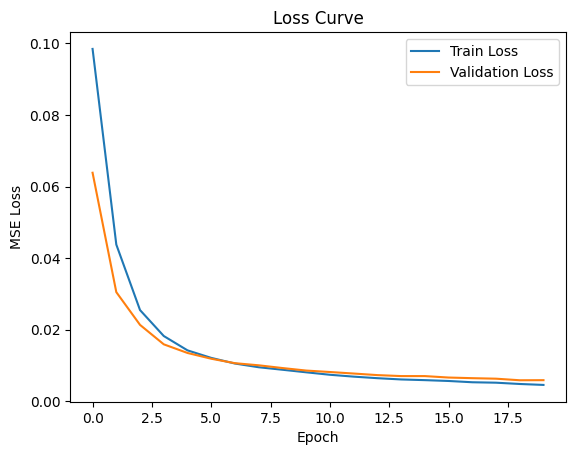

In [33]:
# Training loss curve
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

**Inferences:**
- Effective training of model without signs of overfitting
- Low final MSE loss is an indication of the good accuracy of the Autoencoder in learning to reconstruct the images.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


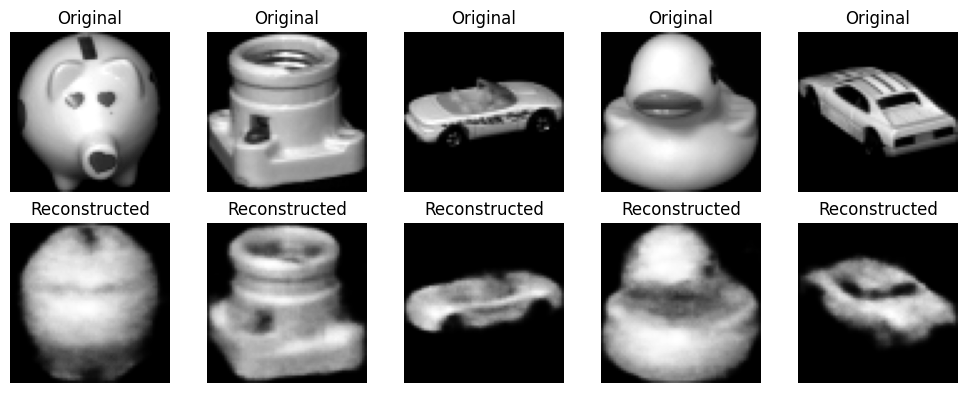

In [35]:
# Original vs reconstructed images
n_examples = 5
reconstructed_images = autoencoder.predict(test_images[:n_examples])

plt.figure(figsize=(10, 4))
for i in range(n_examples):
    # Original image
    plt.subplot(2, n_examples, i + 1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed image
    plt.subplot(2, n_examples, i + 1 + n_examples)
    plt.imshow(reconstructed_images[i].squeeze(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()

Original and reconstructed images are plotted side-by-side for qualitative evaluation. This step helps assess how well the Autoencoder captures features and reconstructs inputs.

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
<ipython-input-38-f3cdcbcd6fd0>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=latent_2d[:, 0], y=latent_2d[:, 1], palette='viridis', s=50)


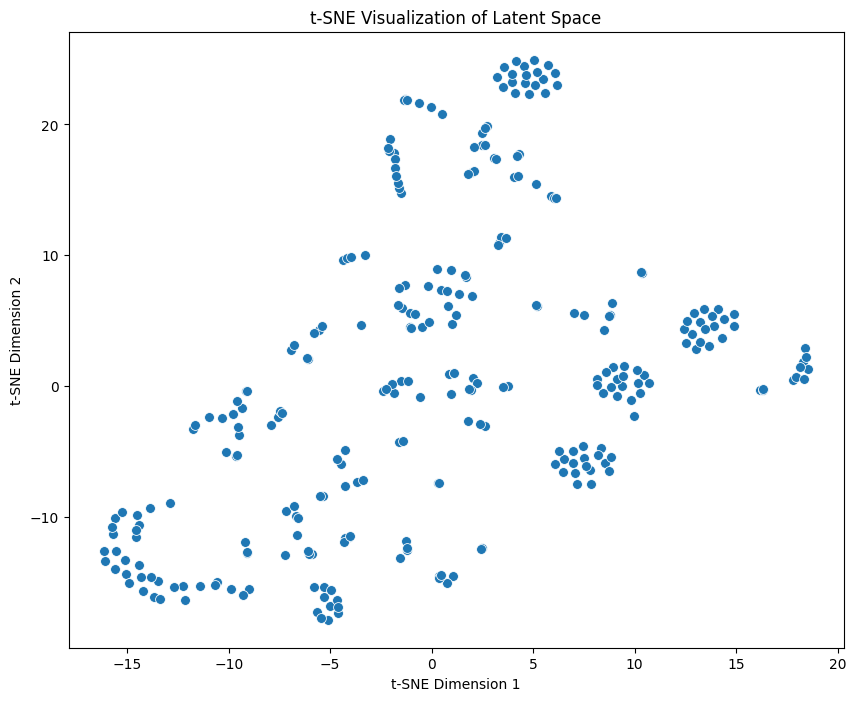

In [38]:
from sklearn.manifold import TSNE
import seaborn as sns

# Extracting latent representations
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(name='dense_1').output)  # Accessing the latent vector layer by name 'dense_1'
latent_representations = encoder.predict(test_images)

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
latent_2d = tsne.fit_transform(latent_representations)

# Visualizing t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x=latent_2d[:, 0], y=latent_2d[:, 1], palette='viridis', s=50)
plt.title('t-SNE Visualization of Latent Space')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

The high-dimensional latent vectors (64-dimensional) are reduced to 2D or 3D using t-SNE for visualization. This highlights clustering patterns, showing whether similar images have close representations in the latent space. The above t-SNE visualization indicates that the Autoencoder has effectively learned a latent space where similar images are grouped together.

In [36]:
# Model architecture
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32768)               │       2,129,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,237,061 (50.50 MB)

 Trainable params: 4,412,353 (16.83 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,824,708 (33.66 MB)

**Inferences:**
- The Autoencoder is well-designed to handle the task, with a balance between convolutional layers (spatial feature extraction) and dense layers (latent space compression).
- The large number of parameters in the dense layers highlights the complexity of encoding and decoding processes, which is suitable for this COIL dataset.